In [10]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Charger les données
data = pd.read_csv("fic_epita_kantar_codes.csv", sep=";", encoding="latin-1")  # ou encoding="iso-8859-1"
variables_orange = ["A9_1_slice",
                    "A9_2_slice",
                    "A9_3_slice",
                    "A9_4_slice",
                    "A9_5_slice",
                    "A9_6_slice",
                    "A9_7_slice",
                    "A9_8_slice",
                    "A9_9_slice",
                    "A9_10_slice",
                    "A9_11_slice",
                    "A9_12_slice",
                    "A9_13_slice",
                    "A9_14_slice",
                    "A9_15_slice",
                    "A9_16_slice",
                    "A10_1_slice",
                    "A10_2_slice",
                    "A10_3_slice",
                    "A10_4_slice",
                    "A10_5_slice",
                    "A10_6_slice",
                    "A10_7_slice",
                    "A10_8_slice",
                    "A11_1_slice",
                    "A11_2_slice",
                    "A11_3_slice",
                    "A11_4_slice",
                    "A11_5_slice",
                    "A11_6_slice",
                    "A11_7_slice",
                    "A11_8_slice",
                    "A11_9_slice",
                    "A11_10_slice",
                    "A11_11_slice",
                    "A11_12_slice",
                    "A11_13_slice",
                    ]
variables_vert = ["A11", "A12", "A13", "A14", "A4", "A5", "A5bis",
                  "A8_1_slice", "A8_2_slice", "A8_3_slice", "A8_4_slice",
                  "B1_1_slice", "B1_2_slice", "B2_1_slice", "B2_2_slice",
                  "B3", "B4", "B6", "C1_1_slice", "C1_2_slice", "C1_3_slice", 
                  "C1_4_slice", "C1_5_slice", "C1_6_slice", "C1_7_slice", 
                  "C1_8_slice", "C1_9_slice"]

In [11]:
data_orange = data[variables_orange]
data_vert = data[variables_vert]
print(data_orange.shape)
print(data_vert.shape)

(5000, 37)
(5000, 27)


In [12]:
#print(data_vert.head())
# If a column has NaN values, fill them with the mean of the column
data_vert = data_vert.fillna(data_vert.mean())
print(data_vert.head())


   A11  A12  A13  A14  A4        A5     A5bis  A8_1_slice  A8_2_slice  \
0    1    0    0    0   1  2.000000  1.821206           2           2   
1    1    0    0    0   1  5.000000  1.821206           2           0   
2    1    0    0    0   1  2.000000  1.821206           5           5   
3    1    1    1    0   1  1.000000  1.821206           2           3   
4    0    1    0    0   2  2.326399  1.000000           1           1   

   A8_3_slice  ...  B6  C1_1_slice  C1_2_slice  C1_3_slice  C1_4_slice  \
0           2  ...   3           2           2           2           2   
1           0  ...   3           4           4           4           4   
2           1  ...   4           4           4           4           4   
3           2  ...   4           4           4           5           5   
4           1  ...   3           4           4           4           4   

   C1_5_slice  C1_6_slice  C1_7_slice  C1_8_slice  C1_9_slice  
0           2           2           2           2   

In [13]:

# Standardiser les données
scaler = StandardScaler()
data_orange_scaled = scaler.fit_transform(data_orange)
data_vert_scaled = scaler.fit_transform(data_vert)


# Fonction pour effectuer le clustering
def perform_clustering(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    silhouette = silhouette_score(data, clusters)
    return clusters, kmeans, silhouette

# Clustering pour les deux groupes de variables
clusters_orange, kmeans_orange, silhouette_orange = perform_clustering(data_orange_scaled, 3)
clusters_vert, kmeans_vert, silhouette_vert = perform_clustering(data_vert_scaled, 5)

print(f"Silhouette Score (Orange): {silhouette_orange}")
print(f"Silhouette Score (Vert): {silhouette_vert}")




Silhouette Score (Orange): 0.15000104165982003
Silhouette Score (Vert): 0.1455179980633828


In [14]:
# Ajouter les clusters aux données
data["Cluster_Orange"] = clusters_orange
data["Cluster_Vert"] = clusters_vert

# Étape 2 : Réaffectation avec variables actives
X_orange = data[variables_orange]
y_orange = data["Cluster_Orange"]
X_train, X_test, y_train, y_test = train_test_split(X_orange, y_orange, test_size=0.2, random_state=42)

rf_orange = RandomForestClassifier(random_state=42)
rf_orange.fit(X_train, y_train)
y_pred_orange = rf_orange.predict(X_test)

print("Classification Report (Orange):")
print(classification_report(y_test, y_pred_orange))



Classification Report (Orange):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       262
           1       0.98      0.90      0.94       184
           2       0.95      0.96      0.96       554

    accuracy                           0.95      1000
   macro avg       0.96      0.94      0.95      1000
weighted avg       0.95      0.95      0.95      1000



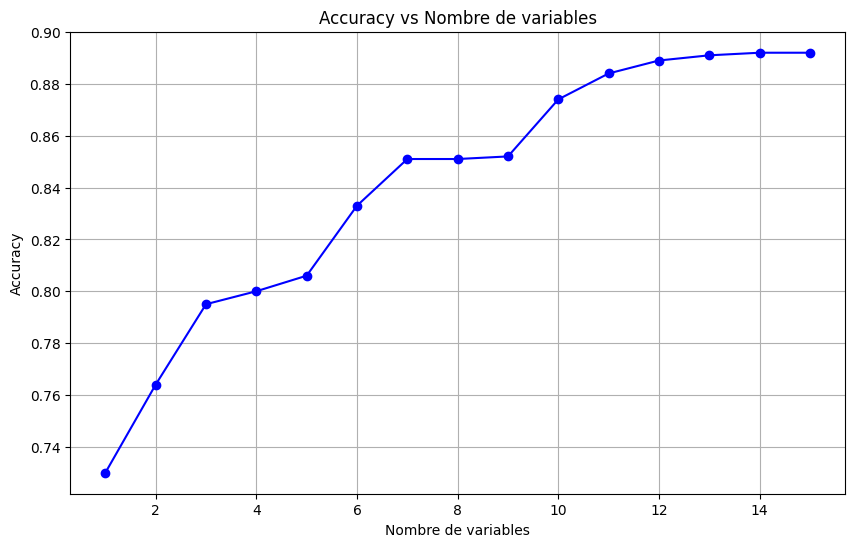


Top 10 des variables les plus importantes:
         feature  importance
33  A11_10_slice    0.087808
28   A11_5_slice    0.086018
30   A11_7_slice    0.064576
26   A11_3_slice    0.059676
31   A11_8_slice    0.050211
34  A11_11_slice    0.042640
7     A9_8_slice    0.041458
13   A9_14_slice    0.033841
20   A10_5_slice    0.033656
3     A9_4_slice    0.033198

Meilleur compromis trouvé:
Nombre de variables: 7
Accuracy: 0.851
Variables sélectionnées (Golden Questions):
1. A11_10_slice (importance: 0.0878)
2. A11_5_slice (importance: 0.0860)
3. A11_7_slice (importance: 0.0646)
4. A11_3_slice (importance: 0.0597)
5. A11_8_slice (importance: 0.0502)
6. A11_11_slice (importance: 0.0426)
7. A9_8_slice (importance: 0.0415)

Rapport de classification avec les Golden Questions:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       262
           1       0.85      0.80      0.83       184
           2       0.85      0.88      0.87       554

 

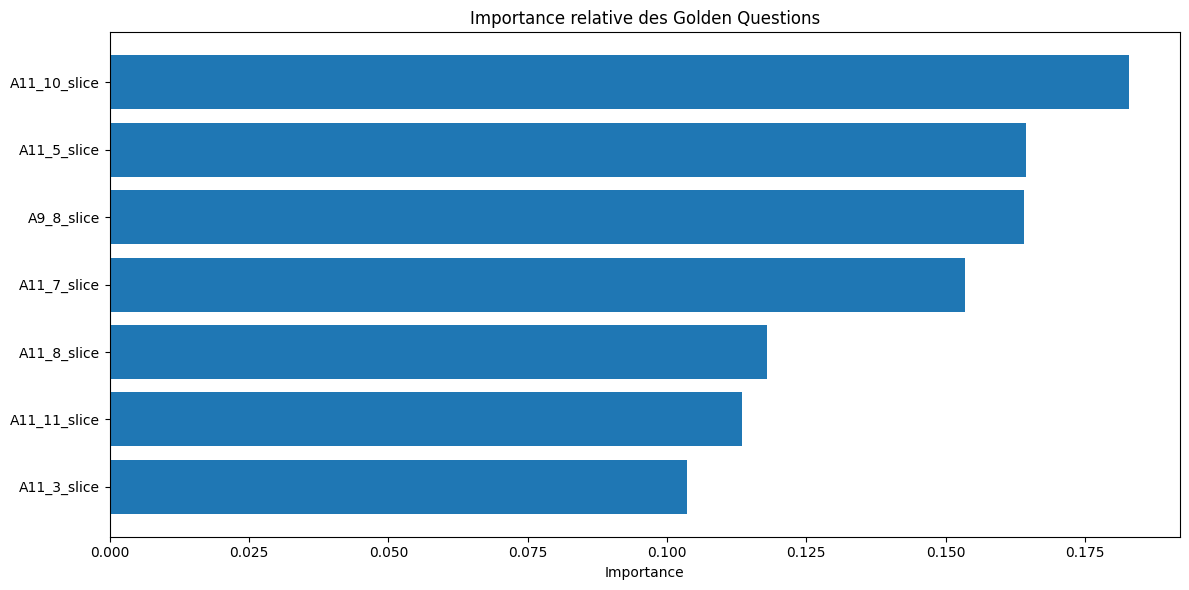


Golden Questions sauvegardées:
['A11_10_slice', 'A11_5_slice', 'A11_7_slice', 'A11_3_slice', 'A11_8_slice', 'A11_11_slice', 'A9_8_slice']


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def find_golden_questions(X, y, n_features_range=None):
    """
    Trouve les meilleures variables (Golden Questions) en optimisant 
    le compromis entre nombre de variables et performance
    """
    # Créer et entraîner le Random Forest initial
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X, y)
    
    # Obtenir l'importance des caractéristiques
    importances = pd.DataFrame({
        'feature': X.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    # Si n_features_range n'est pas spécifié, tester de 1 à nombre total de features
    if n_features_range is None:
        n_features_range = range(1, len(X.columns) + 1)
    
    results = []
    
    # Pour chaque nombre de caractéristiques
    for n_features in n_features_range:
        # Sélectionner les n meilleures caractéristiques
        top_features = importances['feature'].head(n_features).tolist()
        X_selected = X[top_features]
        
        # Split des données
        X_train, X_test, y_train, y_test = train_test_split(
            X_selected, y, test_size=0.2, random_state=42
        )
        
        # Entraîner et évaluer le modèle
        rf = RandomForestClassifier(random_state=42)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        results.append({
            'n_features': n_features,
            'accuracy': accuracy,
            'features': top_features
        })
    
    return pd.DataFrame(results), importances

# Trouver les Golden Questions
results_df, feature_importance = find_golden_questions(
    X_orange, 
    y_orange, 
    range(1, 16)  # Tester de 1 à 15 variables
)

# Visualiser les résultats
plt.figure(figsize=(10, 6))
plt.plot(results_df['n_features'], results_df['accuracy'], 'bo-')
plt.xlabel('Nombre de variables')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Nombre de variables')
plt.grid(True)
plt.show()

# Afficher le top 10 des variables les plus importantes
print("\nTop 10 des variables les plus importantes:")
print(feature_importance.head(10))

# Trouver le meilleur compromis
# Calculer le seuil d'accuracy minimum (95% du maximum)
accuracy_threshold = results_df['accuracy'].max() * 0.95

# Filtrer les résultats qui dépassent le seuil
qualified_results = results_df[results_df['accuracy'] >= accuracy_threshold]

# Sélectionner le résultat avec le minimum de variables parmi les qualifiés
best_result = qualified_results.loc[qualified_results['n_features'].idxmin()]

print("\nMeilleur compromis trouvé:")
print(f"Nombre de variables: {best_result['n_features']}")
print(f"Accuracy: {best_result['accuracy']:.3f}")
print("Variables sélectionnées (Golden Questions):")
for i, feature in enumerate(best_result['features'], 1):
    importance = feature_importance[feature_importance['feature'] == feature]['importance'].iloc[0]
    print(f"{i}. {feature} (importance: {importance:.4f})")

# Validation finale avec les Golden Questions
def validate_golden_questions(X, y, selected_features):
    """
    Valide les performances avec les Golden Questions sélectionnées
    """
    X_selected = X[selected_features]
    X_train, X_test, y_train, y_test = train_test_split(
        X_selected, y, test_size=0.2, random_state=42
    )
    
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    
    print("\nRapport de classification avec les Golden Questions:")
    print(classification_report(y_test, y_pred))
    
    return rf

# Valider avec les Golden Questions sélectionnées
final_model = validate_golden_questions(X_orange, y_orange, best_result['features'])

# Visualiser l'importance relative des Golden Questions
plt.figure(figsize=(12, 6))
final_importances = pd.DataFrame({
    'feature': best_result['features'],
    'importance': final_model.feature_importances_
}).sort_values('importance', ascending=True)

plt.barh(range(len(final_importances)), final_importances['importance'])
plt.yticks(range(len(final_importances)), final_importances['feature'])
plt.xlabel('Importance')
plt.title('Importance relative des Golden Questions')
plt.tight_layout()
plt.show()

# Sauvegarder les Golden Questions
golden_questions = best_result['features']
print("\nGolden Questions sauvegardées:")
print(golden_questions)


=== Affectation des clusters Orange avec variables Vert ===

Évaluation de l'affectation avec Variables Vert:

Rapport de classification:
              precision    recall  f1-score   support

           0       0.60      0.49      0.54       262
           1       0.64      0.47      0.54       184
           2       0.65      0.77      0.71       554

    accuracy                           0.64      1000
   macro avg       0.63      0.58      0.60      1000
weighted avg       0.64      0.64      0.63      1000



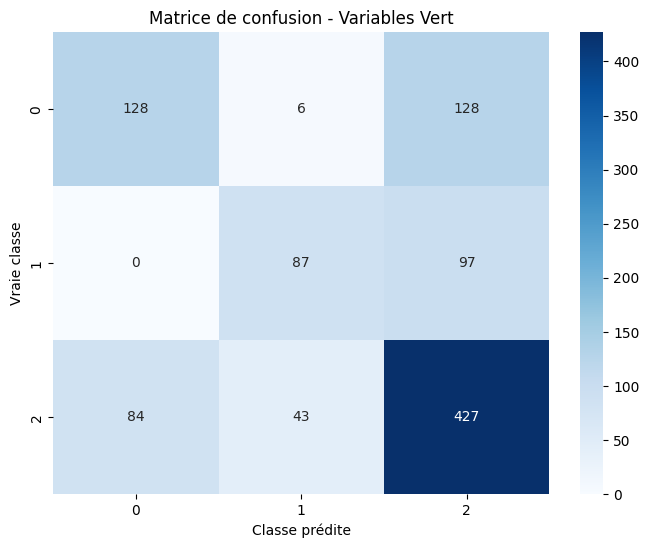

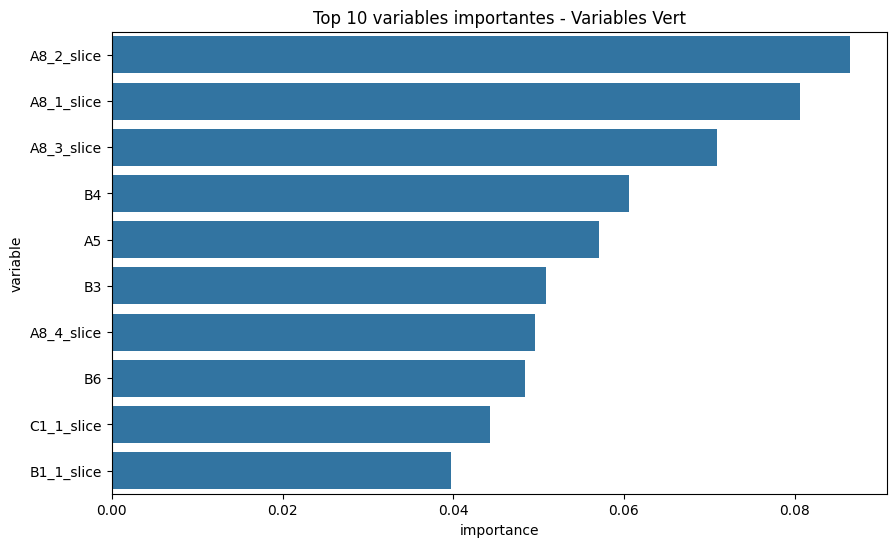


=== Affectation des clusters Orange avec variables RS ===

Évaluation de l'affectation avec Variables RS:

Rapport de classification:
              precision    recall  f1-score   support

           0       0.33      0.32      0.32       262
           1       0.23      0.16      0.19       184
           2       0.55      0.61      0.58       554

    accuracy                           0.45      1000
   macro avg       0.37      0.36      0.36      1000
weighted avg       0.43      0.45      0.44      1000



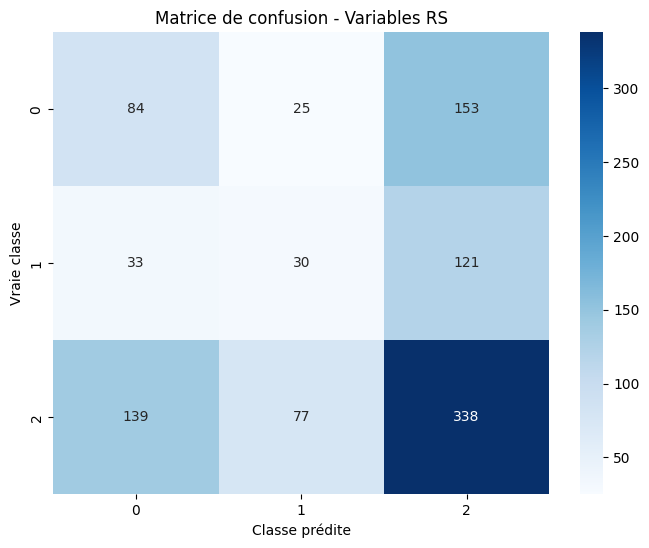

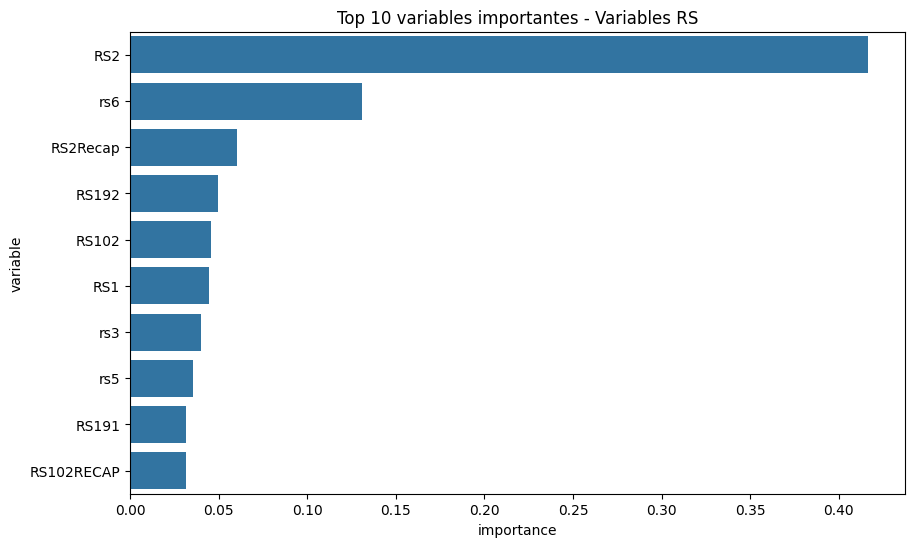


=== Affectation des clusters Vert avec variables Orange ===

Évaluation de l'affectation avec Variables Orange:

Rapport de classification:
              precision    recall  f1-score   support

           0       0.47      0.58      0.52       270
           1       0.46      0.29      0.35        56
           2       0.55      0.73      0.62       394
           3       0.58      0.28      0.38       202
           4       0.25      0.03      0.05        78

    accuracy                           0.52      1000
   macro avg       0.46      0.38      0.38      1000
weighted avg       0.50      0.52      0.49      1000



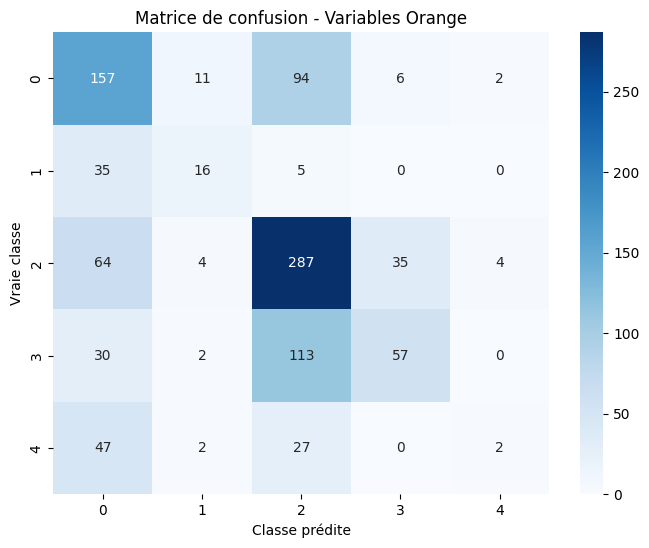

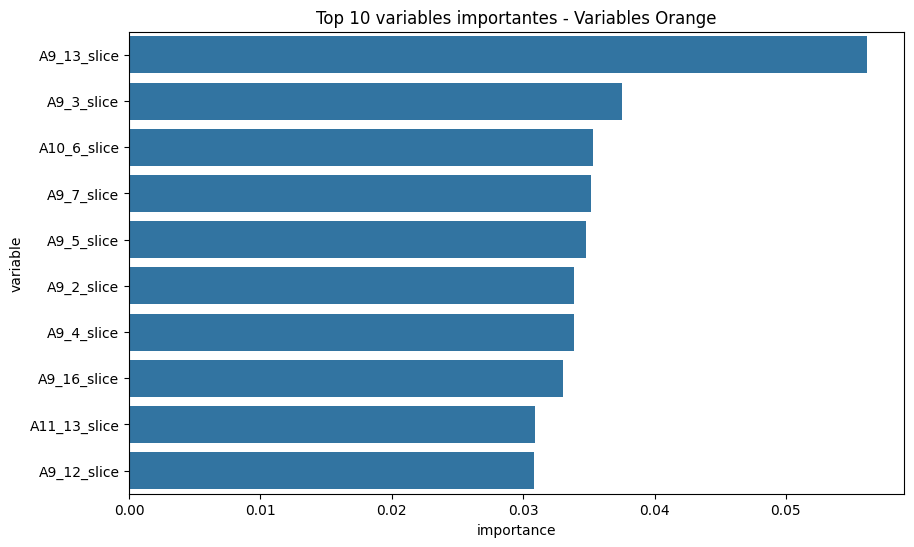


=== Affectation des clusters Vert avec variables RS ===

Évaluation de l'affectation avec Variables RS:

Rapport de classification:
              precision    recall  f1-score   support

           0       0.32      0.24      0.27       270
           1       0.15      0.11      0.13        56
           2       0.50      0.62      0.55       394
           3       0.65      0.74      0.69       202
           4       0.10      0.05      0.07        78

    accuracy                           0.47      1000
   macro avg       0.35      0.35      0.34      1000
weighted avg       0.43      0.47      0.44      1000



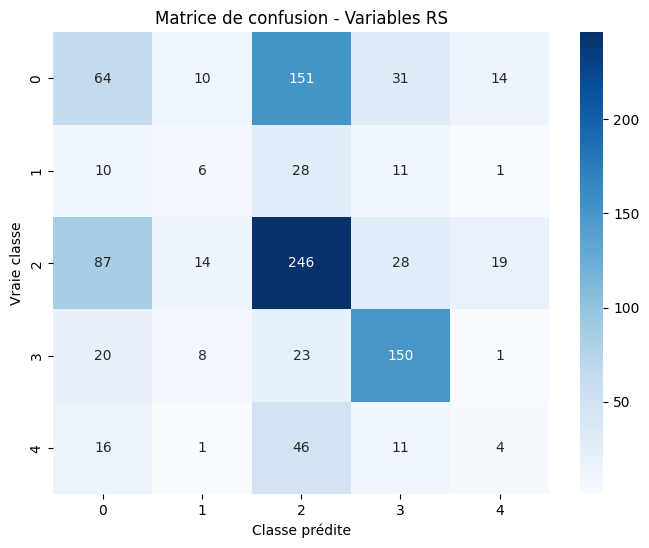

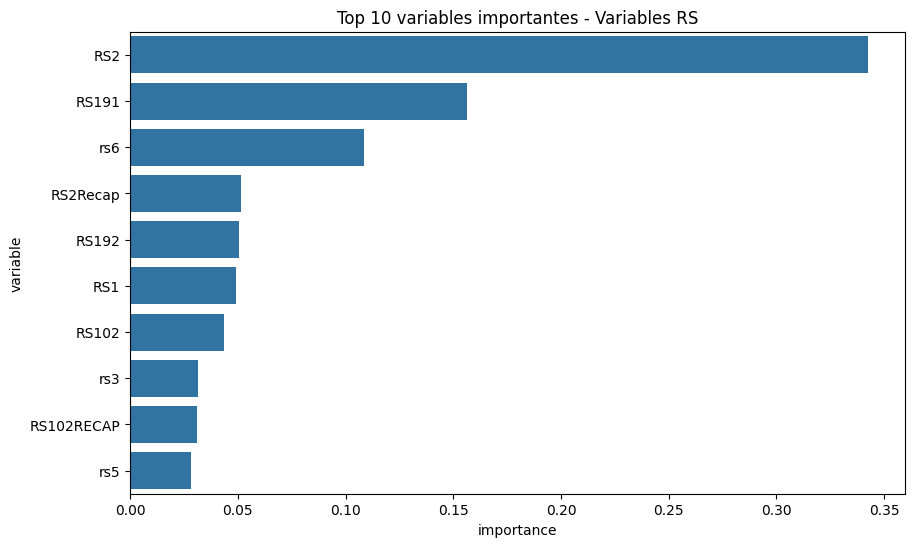

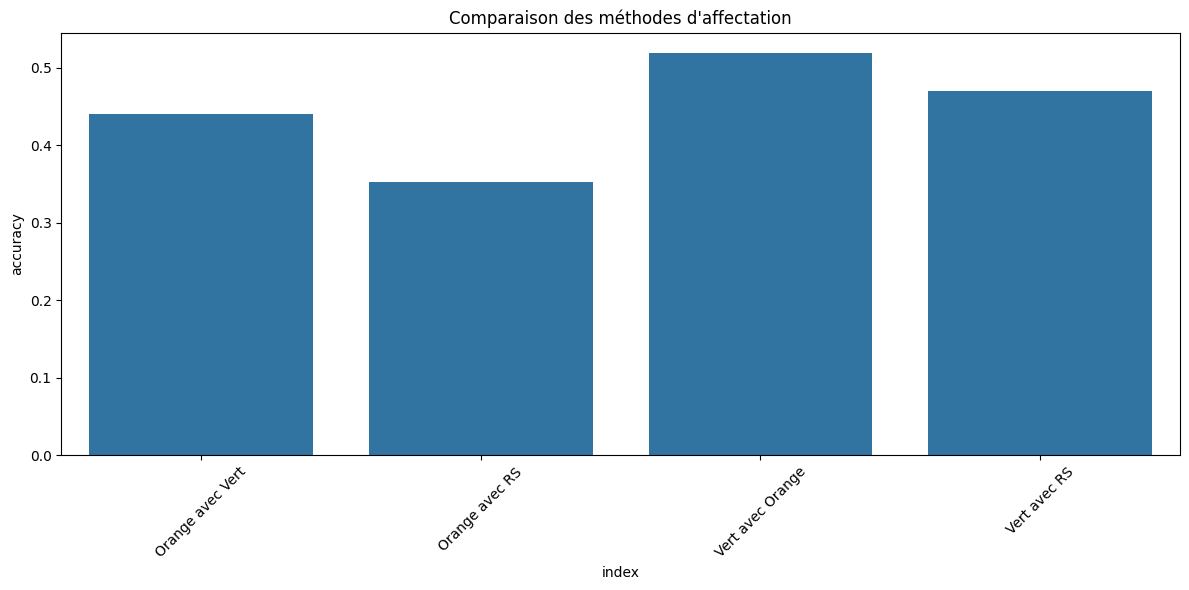


Comparaison des méthodes d'affectation:
                  accuracy  n_variables
Orange avec Vert     0.440         27.0
Orange avec RS       0.353         16.0
Vert avec Orange     0.519         37.0
Vert avec RS         0.470         16.0

=== Validation externe pour Orange avec Vert ===

Validation externe simulée:
Accuracy moyenne: 0.625 (+/- 0.034)

=== Validation externe pour Orange avec RS ===

Validation externe simulée:
Accuracy moyenne: 0.438 (+/- 0.018)

=== Validation externe pour Vert avec Orange ===

Validation externe simulée:
Accuracy moyenne: 0.532 (+/- 0.016)

=== Validation externe pour Vert avec RS ===

Validation externe simulée:
Accuracy moyenne: 0.453 (+/- 0.025)


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

def evaluate_assignment_capacity(X_train, y_train, X_test, y_test, model_name=""):
    """
    Évalue la capacité d'affectation d'un ensemble de variables illustratives
    """
    # Entraînement du modèle
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    
    # Prédictions
    y_pred = rf.predict(X_test)
    
    # Évaluation détaillée
    print(f"\nÉvaluation de l'affectation avec {model_name}:")
    print("\nRapport de classification:")
    print(classification_report(y_test, y_pred))
    
    # Matrice de confusion
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), 
                annot=True, 
                fmt='d',
                cmap='Blues')
    plt.title(f'Matrice de confusion - {model_name}')
    plt.ylabel('Vraie classe')
    plt.xlabel('Classe prédite')
    plt.show()
    
    # Importance des variables
    importances = pd.DataFrame({
        'variable': X_train.columns,
        'importance': rf.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=importances.head(10), x='importance', y='variable')
    plt.title(f'Top 10 variables importantes - {model_name}')
    plt.show()
    
    return rf, importances

# 1. Pour la segmentation Orange

# a) Affectation avec variables Vert
print("\n=== Affectation des clusters Orange avec variables Vert ===")
X_train_vert, X_test_vert, y_train, y_test = train_test_split(
    data[variables_vert], 
    data['Cluster_Orange'],
    test_size=0.2,
    random_state=42
)
model_vert, imp_vert = evaluate_assignment_capacity(
    X_train_vert, 
    y_train, 
    X_test_vert, 
    y_test,
    "Variables Vert"
)

# b) Affectation avec variables RS
variables_rs = ['rs3', 'rs5', 'rs6', 'RS1', 'RS191', 'RS192', 'RS193',
                'RS102RECAP', 'rs11recap2', 'RS11recap', 'RS193bis',
                'RS2Recap', 'RS56Recap', 'RS2', 'RS11', 'RS102']

print("\n=== Affectation des clusters Orange avec variables RS ===")
X_train_rs, X_test_rs, y_train, y_test = train_test_split(
    data[variables_rs], 
    data['Cluster_Orange'],
    test_size=0.2,
    random_state=42
)
model_rs, imp_rs = evaluate_assignment_capacity(
    X_train_rs, 
    y_train, 
    X_test_rs, 
    y_test,
    "Variables RS"
)

# 2. Pour la segmentation Vert

# a) Affectation avec variables Orange
print("\n=== Affectation des clusters Vert avec variables Orange ===")
X_train_orange, X_test_orange, y_train, y_test = train_test_split(
    data[variables_orange], 
    data['Cluster_Vert'],
    test_size=0.2,
    random_state=42
)
model_orange, imp_orange = evaluate_assignment_capacity(
    X_train_orange, 
    y_train, 
    X_test_orange, 
    y_test,
    "Variables Orange"
)

# b) Affectation avec variables RS
print("\n=== Affectation des clusters Vert avec variables RS ===")
X_train_rs, X_test_rs, y_train, y_test = train_test_split(
    data[variables_rs], 
    data['Cluster_Vert'],
    test_size=0.2,
    random_state=42
)
model_rs_vert, imp_rs_vert = evaluate_assignment_capacity(
    X_train_rs, 
    y_train, 
    X_test_rs, 
    y_test,
    "Variables RS"
)

# Comparaison des capacités d'affectation
def compare_assignment_methods(results_dict):
    """
    Compare les différentes méthodes d'affectation
    """
    comparison = pd.DataFrame(results_dict).T
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=comparison.reset_index(), x='index', y='accuracy')
    plt.title('Comparaison des méthodes d\'affectation')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return comparison

# Créer un dictionnaire des résultats
results = {
    'Orange avec Vert': {
        'accuracy': accuracy_score(y_test, model_vert.predict(X_test_vert)),
        'n_variables': len(variables_vert)
    },
    'Orange avec RS': {
        'accuracy': accuracy_score(y_test, model_rs.predict(X_test_rs)),
        'n_variables': len(variables_rs)
    },
    'Vert avec Orange': {
        'accuracy': accuracy_score(y_test, model_orange.predict(X_test_orange)),
        'n_variables': len(variables_orange)
    },
    'Vert avec RS': {
        'accuracy': accuracy_score(y_test, model_rs_vert.predict(X_test_rs)),
        'n_variables': len(variables_rs)
    }
}

comparison_df = compare_assignment_methods(results)
print("\nComparaison des méthodes d'affectation:")
print(comparison_df)

# Validation sur un échantillon externe (simulation)
def simulate_external_validation(model, X, y, n_splits=5):
    """
    Simule la validation sur un échantillon externe
    """
    cv_scores = cross_val_score(model, X, y, cv=n_splits)
    print(f"\nValidation externe simulée:")
    print(f"Accuracy moyenne: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
    return cv_scores

# Simuler la validation externe pour chaque méthode
for name, model, X, y in [
    ('Orange avec Vert', model_vert, data[variables_vert], data['Cluster_Orange']),
    ('Orange avec RS', model_rs, data[variables_rs], data['Cluster_Orange']),
    ('Vert avec Orange', model_orange, data[variables_orange], data['Cluster_Vert']),
    ('Vert avec RS', model_rs_vert, data[variables_rs], data['Cluster_Vert'])
]:
    print(f"\n=== Validation externe pour {name} ===")
    cv_scores = simulate_external_validation(model, X, y)